<a href="https://colab.research.google.com/github/simandi2877/eva/blob/master/Project6/Assignment_6A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Assignment 6A

The concepts learnt in this module are using dilation convolutions. Dilation convolutions will be help ful get a big picture context of the images. This approach will help to achieve the segmentation of images. 

Systematic dialtion supports exponential expansion of receptive field without loss of resolution


**When 3x3 convolutions are used, Receptive field = (2pow(i+1) − 1)×(2pow(i+1) − 1) where i is the dilation rate.**

dilation rate of 1, so receptive field is 3x3, out put channel size remains same as we have used border_mode='same'

dilaration rate of 2 - receptive field of 7x7

dilaration rate of 3 - receptive field of 15x15

dilaration rate of 4 - receptive field of 31x31

In [0]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D, SeparableConv2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils

In [22]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))
print (num_classes)

10


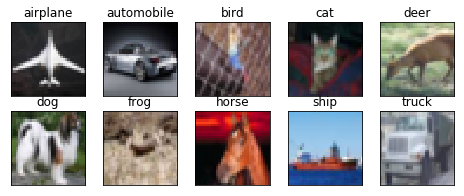

In [23]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

In [30]:
# Define the model
model = Sequential()
#When 3x3 convolutions are used, Receptive field = (2**(i+1) − 1)×(2**(i+1) − 1) where i is the dilation rate.

model.add(Convolution2D(48, 3, 3, border_mode='same', input_shape=(32, 32, 3))) #30
model.add(Activation('relu'))
model.add(Convolution2D(48, 3, 3, activation='relu') ) #28

model.add(MaxPooling2D(pool_size=(2, 2))) #14
model.add(Dropout(0.25))

model.add(Convolution2D(96, 3, 3, border_mode='same', activation='relu')) #14
model.add(Convolution2D(96, 3, 3, activation='relu')) #12

model.add(MaxPooling2D(pool_size=(2, 2))) #6
model.add(Dropout(0.25))

model.add(Convolution2D(192, 3, 3, border_mode='same', activation='relu')) #6
model.add(Convolution2D(192, 3, 3, activation='relu')) #3

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))


model.add(Convolution2D(128, 1,1, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(10, 2))
model.add(Flatten())
model.add(Activation('softmax'))

from keras.callbacks import LearningRateScheduler
import math
def scheduler(epoch, lr):
  return round(0.003 * 1/(1 + 0.319 * epoch), 10)
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3), activation="relu", padding="same")`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3), activation="relu")`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(192, (3, 3), activation="relu", padding="same")`


In [31]:
model.summary()
print(train_features.shape[0])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_49 (Conv2D)           (None, 32, 32, 48)        1344      
_________________________________________________________________
activation_16 (Activation)   (None, 32, 32, 48)        0         
_________________________________________________________________
conv2d_50 (Conv2D)           (None, 30, 30, 48)        20784     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 15, 15, 48)        0         
_________________________________________________________________
dropout_34 (Dropout)         (None, 15, 15, 48)        0         
_________________________________________________________________
conv2d_51 (Conv2D)           (None, 15, 15, 96)        41568     
_________________________________________________________________
conv2d_52 (Conv2D)           (None, 13, 13, 96)        83040     
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., steps_per_epoch=390, validation_data=(array([[[..., verbose=1, epochs=100)`
  if sys.path[0] == '':


Epoch 1/100


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:724: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


390/390 [==============================] - 11s 28ms/step - loss: 1.5487 - acc: 0.4236 - val_loss: 1.2791 - val_acc: 0.5447
Epoch 2/100
390/390 [==============================] - 9s 24ms/step - loss: 1.0586 - acc: 0.6230 - val_loss: 0.9354 - val_acc: 0.6710
Epoch 3/100
390/390 [==============================] - 9s 24ms/step - loss: 0.8847 - acc: 0.6888 - val_loss: 0.8711 - val_acc: 0.6972
Epoch 4/100
390/390 [==============================] - 9s 24ms/step - loss: 0.7711 - acc: 0.7297 - val_loss: 0.7253 - val_acc: 0.7548
Epoch 5/100
390/390 [==============================] - 9s 24ms/step - loss: 0.7081 - acc: 0.7516 - val_loss: 0.7712 - val_acc: 0.7449
Epoch 6/100
390/390 [==============================] - 9s 24ms/step - loss: 0.6448 - acc: 0.7735 - val_loss: 0.6590 - val_acc: 0.7737
Epoch 7/100
390/390 [==============================] - 9s 24ms/step - loss: 0.6063 - acc: 0.7871 - val_loss: 0.6054 - val_acc: 0.7913
Epoch 8/100
390/390 [==============================] - 9s 24ms/step - los

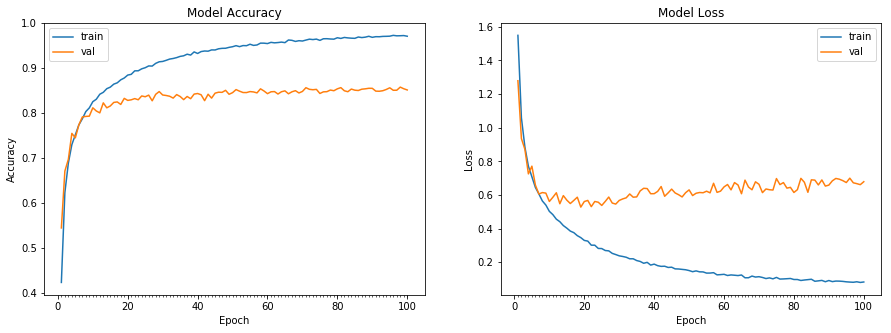

Accuracy on test data is: 85.13


In [32]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False, featurewise_center=True, featurewise_std_normalization=True)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], steps_per_epoch=128, nb_epoch = 100, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))